# Introduction to Convolutional Neural Networks (CNN) and Computer Vison with TensorFlow

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Get the data

In [2]:
# dataset can be found on kaggle (food101), a preprocessed version is used here (see: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb)
import zipfile



In [3]:
# path = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"

#zip_ref = zipfile.ZipFile('pizza_steak.zip')

In [4]:
#zip_ref.extractall()
#zip_ref.close()

# Inspect the data

becoming familiar with the data

In [5]:
#%magic

%ls pizza_steak\train

 Volume in Laufwerk C: hat keine Bezeichnung.
 Volumeseriennummer: 3CAA-4105

 Verzeichnis von C:\Users\neema\Notebooks\Udemy_TensorFlow\pizza_steak\train

25.12.2021  11:17    <DIR>          .
25.12.2021  11:17    <DIR>          ..
25.12.2021  11:17    <DIR>          pizza
25.12.2021  11:17    <DIR>          steak
               0 Datei(en),              0 Bytes
               4 Verzeichnis(se), 435.692.621.824 Bytes frei


In [6]:
#%ls pizza_steak\train\steak

In [7]:
import os

# list the number of files in a directory

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [8]:
# another way to count files in a dir

num_steak_images_train = len(os.listdir('pizza_steak\\train\\steak'))
num_steak_images_train

750

### visualize the images

In [9]:
# get the classnames programmatically

import pathlib

data_dir = pathlib.Path("pizza_steak\\train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [10]:
import matplotlib.image as mpimg

In [11]:
def view_random_image(target_dir, target_class):
    #setup target dir
    
    class_list = os.listdir(target_dir)
    random_class = np.random.randint(0, len(class_list))
    
    target_folder = os.path.join(target_dir, target_class[random_class])
    #target_folder = target_dir+target_class 
    image_list = os.listdir(target_folder)
    random_index = np.random.randint(0, len(image_list))
    
    rand_image = os.path.join(target_folder,image_list[random_index])
    
    img = mpimg.imread(rand_image)
    plt.imshow(img)
    plt.title(target_class[random_class])
    plt.axis('off');
    
    print(f"Image shape: {img.shape}")
    
    return img

Image shape: (512, 512, 3)


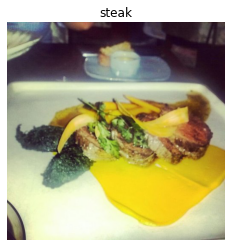

In [12]:
img = view_random_image(data_dir, class_names)

In [13]:
img.shape #returns width, height, colorchannels

(512, 512, 3)

### Builind an end-to-end CNN

* load the images
* preprocess (normalize)
* build a CNN
* compile
* fit

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# normalization/scaling the pixel values
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup path
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test" 
# import data from the directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                               batch_size=32,
                               target_size=(224,224),
                               class_mode='binary',
                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                               batch_size=32,
                               target_size=(224,224),
                               class_mode='binary',
                               seed=42)

# build a cnn (sam as Tiny VGG on the CNN explaner website)

model_01 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation='relu',
                          input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, 
                             padding='valid'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile our CNN
model_01.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics='accuracy')
#fit the model
history_01 = model_01.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=valid_data,
                          validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 29s 616ms/step - loss: 0.5655 - accuracy: 0.6947 - val_loss: 0.3740 - val_accuracy: 0.8480
Epoch 2/5
47/47 [==============================] - 28s 606ms/step - loss: 0.4153 - accuracy: 0.8093 - val_loss: 0.3541 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 29s 610ms/step - loss: 0.3720 - accuracy: 0.8460 - val_loss: 0.3192 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 29s 616ms/step - loss: 0.3562 - accuracy: 0.8433 - val_loss: 0.2986 - val_accuracy: 0.8880
Epoch 5/5
47/47 [==============================] - 30s 628ms/step - loss: 0.3332 - accuracy: 0.8573 - val_loss: 0.2981 - val_accuracy: 0.8720


In [15]:
model_01.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

### feeding the image data to a non-CNN 

In [16]:
tf.random.set_seed(42)

model_02 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_02.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics='accuracy')

history_02 = model_02.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=valid_data,
                         validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 7s 150ms/step - loss: 1.0376 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 145ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 7s 145ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 145ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 145ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [19]:
tf.random.set_seed(42)

model_03 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_03.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics='accuracy')

history_03 = model_03.fit(train_data,
                         epochs=5,
                         steps_per_epoch=len(train_data),
                         validation_data=valid_data,
                         validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 8s 177ms/step - loss: 3.1112 - accuracy: 0.6393 - val_loss: 0.8111 - val_accuracy: 0.7160
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 1.0057 - accuracy: 0.6873 - val_loss: 0.6394 - val_accuracy: 0.7140
Epoch 3/5
47/47 [==============================] - 8s 173ms/step - loss: 0.8154 - accuracy: 0.7207 - val_loss: 1.1125 - val_accuracy: 0.6500
Epoch 4/5
47/47 [==============================] - 8s 172ms/step - loss: 0.7357 - accuracy: 0.7293 - val_loss: 1.7519 - val_accuracy: 0.6020
Epoch 5/5
47/47 [==============================] - 8s 174ms/step - loss: 0.5772 - accuracy: 0.7860 - val_loss: 0.4534 - val_accuracy: 0.7760


In [20]:
model_03.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


model_03 has over 15Mio parameters and still performs poorer than model_01 around 31K parameters (~500:1)

In [21]:
224*224*3*100

15052800

# Binary Classification: Let'S break it down!

1. Visualize
2. Preprocess
3. Created a model
4. Fit the model
5. Evaluate
6. Tweak different parameters
7. repeat